In [1]:
import json
from train_nn2 import *

In [2]:
nx=31
ny=31
direcoty_path="../Results/Nodes_"+str((nx+1)*(ny+1))

# Path to your JSON file
filename = direcoty_path+ "/data_1_parameter_final_uniform.json"
# Open and load the file
with open(filename, 'r') as file:
    data = json.load(file)

# c = data["Gempy_Input"]
# u_data = data["PDE_Output"]
# J_data = data["PDE_Jacobian"]
# phi = data["Decoder_matrix"]
# u_shift = data["bias"]
# M_output = data["Mass_Matrix"]

In [3]:
# for keys, values in data.items():
#     print(keys)
d = np.array(data["eigen-values"])
c = np.array(data["Gempy_Inputs"])
u_data = np.array(data["PDE_outputs"])
J_data = np.array(data["Jacobian"])
Mphi = np.array(data["Encoder_matrix"])
phi = np.array(data["Decoder_matrix"])
u_shift = np.array(data["bias"])
M_output = np.array(data["Mass_Matrix"])

/var/folders/lr/h2867zhs72gcy61j6_cy0n0r0000gq/T/ipykernel_12677/718832458.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.arange(d.shape[0]), np.log10(d))


Text(0.5, 1.0, 'Eigenvalue distribution')

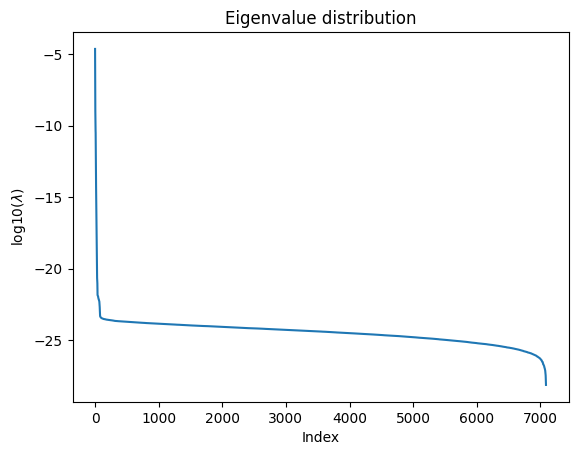

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.arange(d.shape[0]), np.log10(d))
plt.xlabel("Index")
plt.ylabel("log10($\lambda$)")
plt.title("Eigenvalue distribution")

In [5]:
dK= c.shape[1]
r = np.sum(d>=1e-20)
print(r)
r =30
r

30


30

In [6]:
Mphi_r = Mphi[:, :r]
phi_r = phi[:,:r]
Mphi_r.shape, phi_r.shape

((3969, 30), (3969, 30))

In [7]:
# Save to file
np.save('./saved_model/Mphi_r.npy', Mphi_r)
np.save('./saved_model/phi_r.npy', phi_r)
np.save('./saved_model/u_shift.npy', u_shift)

In [8]:
Dur = np.einsum('ru,duc->drc',Mphi_r.T,J_data)
Dur_re = np.einsum('ru, duc->drc', phi_r, Dur)

In [9]:
Frobenius_norm = calulate_matrix_norm_square(torch.tensor(J_data), torch.tensor(Dur_re), torch.tensor(M_output))
A_T_M_A = torch.einsum("bmi, mk, bkj->bij", torch.tensor(J_data), torch.tensor(M_output), torch.tensor(J_data),)
true_matrix_norm = torch.einsum("bii->b", A_T_M_A)
H1 = 1 - torch.sqrt(torch.sum((Frobenius_norm)/true_matrix_norm))
print("H1 accuracy : ", H1)

H1 accuracy :  tensor(1.0000, dtype=torch.float64)


In [10]:
ur = np.einsum('ur,du->dr',Mphi_r,u_data)
phi_r_I = torch.eye(ur.shape[1])
bias_O = torch.zeros(ur.shape[1])
Mass_Matrix_I = torch.eye(ur.shape[1])

In [11]:
epoch = 400
lr = 0.002
# layer_sizes=[dK,4*dK,16*dK, r,r]
layer_sizes=[dK,2*dK, 4*dK, 8*dK, 16*dK, r,r,r]
#layer_sizes=[dK,dK, r,r]
#nn_setup = NN_setup(Gempy_Inputs=c, PDE_outputs=ur, Jacobian=Dur, Decoder_matrix=phi_r_I, bias=bias_O, Mass_Matrix=Mass_Matrix_I)
# nn_setup = NN_setup(Gempy_Inputs=c, PDE_outputs=u_data, Jacobian=J_data, Decoder_matrix=phi_r, bias=u_shift, Mass_Matrix=M_output, Model="0")
# nn_setup.train_network_M2(layer_sizes=layer_sizes, num_epochs=epoch, lr =lr)

In [12]:
#nn_setup.train_network_Jacobian_full(layer_sizes=layer_sizes, num_epochs=epoch, scale_factor=10, lr=lr)

In [13]:
epoch=200
nn_setup2 = NN_setup(Gempy_Inputs=c, PDE_outputs=u_data, Jacobian=J_data, Decoder_matrix=phi_r, bias=u_shift, Mass_Matrix=M_output, Model="s")
nn_setup2.train_network_M2(layer_sizes=layer_sizes, num_epochs=epoch, lr =lr)

Using MPS device
Train size: 8191,Valid size: 2730,  Test size: 2732
Epoch [0/200], Train Loss: 0.0157, Val Loss: 0.0022
Epoch [10/200], Train Loss: 0.0000, Val Loss: 0.0005
Epoch [20/200], Train Loss: 0.0000, Val Loss: 0.0032
Epoch [30/200], Train Loss: 0.0000, Val Loss: 0.0003
Epoch [40/200], Train Loss: 0.0000, Val Loss: 0.0003
Epoch [50/200], Train Loss: 0.0000, Val Loss: 0.0007
Epoch [60/200], Train Loss: 0.0000, Val Loss: 0.0003
Epoch [70/200], Train Loss: 0.0000, Val Loss: 0.0002
Epoch [80/200], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [90/200], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [100/200], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [110/200], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [120/200], Train Loss: 0.0000, Val Loss: 0.0002
Epoch [130/200], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [140/200], Train Loss: 0.0000, Val Loss: 0.0001
Epoch [150/200], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [160/200], Train Loss: 0.0000, Val Loss: 0.0000
Epoch [170/200], Train L

In [14]:
epoch=200
nn_setup2.train_network_Jacobian_full(layer_sizes=layer_sizes, num_epochs=epoch, scale_factor=10, lr=lr)

Epoch [0/200], Train Loss: 0.0126, Val Loss: 0.0131, L2 Loss: 0.0000, F2 Loss: 0.0013
Epoch [10/200], Train Loss: 0.0060, Val Loss: 0.0060, L2 Loss: 0.0000, F2 Loss: 0.0006
Epoch [20/200], Train Loss: 0.0044, Val Loss: 0.0039, L2 Loss: 0.0001, F2 Loss: 0.0004
Epoch [30/200], Train Loss: 0.0033, Val Loss: 0.0034, L2 Loss: 0.0000, F2 Loss: 0.0003
Epoch [40/200], Train Loss: 0.0026, Val Loss: 0.0023, L2 Loss: 0.0000, F2 Loss: 0.0003
Epoch [50/200], Train Loss: 0.0009, Val Loss: 0.0009, L2 Loss: 0.0000, F2 Loss: 0.0001
Epoch [60/200], Train Loss: 0.0006, Val Loss: 0.0006, L2 Loss: 0.0000, F2 Loss: 0.0001
Epoch [70/200], Train Loss: 0.0006, Val Loss: 0.0006, L2 Loss: 0.0000, F2 Loss: 0.0001
Epoch [80/200], Train Loss: 0.0005, Val Loss: 0.0005, L2 Loss: 0.0000, F2 Loss: 0.0000
Epoch [90/200], Train Loss: 0.0005, Val Loss: 0.0004, L2 Loss: 0.0000, F2 Loss: 0.0000
Epoch [100/200], Train Loss: 0.0004, Val Loss: 0.0004, L2 Loss: 0.0000, F2 Loss: 0.0000
Epoch [110/200], Train Loss: 0.0004, Val Lo

In [15]:
#from train_nn_class import *

In [16]:
#nn_setup2 = NN_L2_setup(Gempy_Inputs=c, PDE_outputs=u_data, Jacobian=J_data,Encoder_matrix=Mphi_r.T, Decoder_matrix=phi_r, bias=u_shift, Mass_Matrix=M_output, Model="o", preferred_device="cpu")

In [17]:
#nn_setup2.train_network_M2(layer_sizes=layer_sizes, num_epochs=epoch, lr =lr)

In [18]:
#nn_setup2.train_network_Jacobian_full(layer_sizes=layer_sizes, num_epochs=epoch, scale_factor=10, lr=lr)

In [19]:
#nn_setup2.train_network_Jacobian_truncated(layer_sizes=layer_sizes, num_epochs=epoch, scale_factor=10, ran_size=5, lr=0.002)